In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# context

| Column  | Description  |
|---|---|
| Price  | Price in US dollars (326-18,823)  |
| Carat  | Weight of the diamond (0.2--5.01)  |
| Cut  | Quality of the cut (Fair, Good, Very Good, Premium, Ideal)  |
| Color  | Diamond colour, from J (worst) to D (best)  |
| Clarity  | A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))   |
| x  | Length in mm (0--10.74)  |
| y  | Width in mm (0--58.9)  |
| z  | Depth in mm (0--31.8)  |
| Depth  | Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)  |
| Table  | Width of top of diamond relative to widest point (43--95)  |

# data cleaning

## open

In [2]:
df_diamonds = pd.read_csv("../data/raw-data/diamonds.csv", index_col=False)

In [3]:
df_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


## functions 

In [4]:
def creating_classification(df):
    '''this function it is used to classify diamonds measures'''
    
    #clarity 0(worst), 7(best)
    clarity_classification = {'I1' : 0, 'SI2': 1, 'SI1':2, 'VS2':3, 'VS1':4, 'VVS2':5, 'VVS1':6, 'IF':7}
    df['clarity_number'] = df['clarity'].map(clarity_classification)
    
    #color 0(worst), 6(best)
    color_classification = {'J':0, 'I':1, 'H':2, 'G':3, 'F':4, 'E':5, 'D':6}
    df['color_number'] = df['color'].map(color_classification)
    
    #cut 0(worst), 4(best)
    cut_classification = {'Fair': 0, 'Good': 1, 'Very Good':2, 'Premium': 3, 'Ideal':4}
    df['cut_number'] = df['cut'].map(cut_classification)

In [5]:
creating_classification(df_diamonds)
df_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_number,color_number,cut_number
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,2,5,3
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,4,5,1
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,1,3
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,0,1
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,5,0,2


# missing values

In [6]:
#values where x, y and z can be 0
mask = (df_diamonds['x'] == 0) | (df_diamonds['y'] == 0) | (df_diamonds['z'] == 0)
df_diamonds.loc[mask,:].head()

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_number,color_number,cut_number
2010,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0,1,3,3
2104,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0,0,2,3
4323,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0,1,3,3
4941,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0,1,4,3
9187,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0,0,3,1


In [7]:
#function to validate z
def calculate_z(df, x='x', y='y', z='z', depth='depth'):
    '''  this formula is used to calculate z value'''
    for row in range(df.shape[0]):
        if df[z][row] == 0:
            df[z][row] = (df[x][row] + df[y][row]) * df[depth][row] / 200

In [8]:
calculate_z(df=df_diamonds)

<ipython-input-7-e34fcfce2da1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[z][row] = (df[x][row] + df[y][row]) * df[depth][row] / 200


In [9]:
#replacing 0 values to nan values
df_diamonds['z'] = df_diamonds['z'].replace(0, np.nan)
df_diamonds['x'] = df_diamonds['x'].replace(0, np.nan)
df_diamonds['y'] = df_diamonds['y'].replace(0, np.nan)

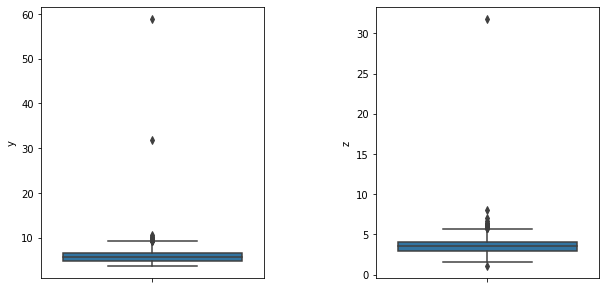

In [10]:
#checking outliers
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=df_diamonds.y, ax=ax[0])
sns.boxplot(y=df_diamonds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

In [11]:
#check outliers / wrong values
mask = (df_diamonds['y'] > 10) | (df_diamonds['z'] > 6)
df_diamonds.loc[mask,:]

,carat,cut,color,clarity,depth,table,price,x,y,z,clarity_number,color_number,cut_number
21444,3.65,Fair,H,I1,67.1,53.0,11668,9.53,9.48,6.38,0,2,0
21828,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06,1,2,3
22066,3.50,Ideal,H,I1,62.8,57.0,12587,9.65,9.59,6.03,0,2,4
23577,4.01,Premium,I,I1,61.0,61.0,15223,10.14,10.10,6.17,0,1,3
23578,4.01,Premium,J,I1,62.5,62.0,15223,10.02,9.94,6.24,0,0,3
23751,2.01,Fair,G,SI2,65.6,56.0,15562,7.89,7.84,6.16,1,3,0
23958,3.40,Fair,D,I1,66.8,52.0,15964,9.42,9.34,6.27,0,6,0
23971,4.00,Very Good,I,I1,63.3,58.0,15984,10.01,9.94,6.31,0,1,2
24049,3.67,Premium,I,I1,62.4,56.0,16193,9.86,9.81,6.13,0,1,3
24851,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98,0,0,0


In [12]:
#I classificate every z value bigger than 30 as a wrong value
mask = (df_diamonds['z'] > 30)
df_diamonds.loc[mask,['z']] = 0

In [13]:
#aplly again z calculate for the new zeros
calculate_z(df_diamonds)

<ipython-input-7-e34fcfce2da1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[z][row] = (df[x][row] + df[y][row]) * df[depth][row] / 200


In [14]:
#I classificate every y value bigger than 30 as a wrong value
mask = (df_diamonds['y'] > 30)
df_diamonds.loc[mask,['y']] = 0

In [15]:
#function to calculate y
def calculate_y(df, x='x', y='y', z='z', depth='depth'):
    ''' this function calculates z values'''
    for row in range(df.shape[0]):
        if df[y][row] == 0:
            df[y][row] = round((200 *df[z][row] / df[depth][row]) - df[x][row],2)

In [16]:
calculate_y(df_diamonds)

<ipython-input-15-070c49b04f0e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[y][row] = round((200 *df[z][row] / df[depth][row]) - df[x][row],2)


In [17]:
df_diamonds.dropna(inplace=True)

In [18]:
df_diamonds.describe()

,carat,depth,table,price,x,y,z,clarity_number,color_number,cut_number
count,48933.000000,48933.000000,48933.000000,48933.000000,48933.000000,48933.000000,48933.000000,48933.000000,48933.000000,48933.000000
mean,0.797748,61.751904,57.451041,3933.641592,5.731532,5.733792,3.539596,3.055504,3.407251,2.906484
std,0.474093,1.429933,2.232986,3988.524750,1.119905,1.113872,0.692143,1.645522,1.699909,1.116507
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,2.000000,2.000000,2.000000
50%,0.700000,61.800000,57.000000,2401.000000,5.690000,5.710000,3.520000,3.000000,3.000000,3.000000
75%,1.040000,62.500000,59.000000,5331.000000,6.540000,6.540000,4.040000,4.000000,5.000000,4.000000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,19.280000,8.060000,7.000000,6.000000,4.000000


# data analysis

In [19]:
df_diamonds.groupby(by=['color']).mean() 

,carat,depth,table,price,x,y,z,clarity_number,color_number,cut_number
color,,,,,,,,,,
D,0.656904,61.707891,57.384868,3162.202468,5.415491,5.419706,3.342418,2.695730,6.0,2.933106
E,0.658942,61.660785,57.490585,3091.383020,5.413941,5.419202,3.339072,2.975871,5.0,2.896042
F,0.736225,61.701607,57.420425,3722.164490,5.616532,5.620319,3.466205,3.139984,4.0,2.886140
G,0.770016,61.757540,57.290170,3989.929995,5.676257,5.678986,3.506356,3.470102,3.0,2.989985
H,0.909698,61.833515,57.518740,4475.434748,5.980141,5.977198,3.696404,2.937003,2.0,2.881432
I,1.030982,61.853078,57.570239,5121.677848,6.230671,6.230626,3.851678,2.958069,1.0,2.879935
J,1.164531,61.888268,57.798701,5342.467323,6.523567,6.523402,4.036268,2.778740,0.0,2.735039


In [20]:
mask = df_diamonds['carat'] < 1
color_carat = df_diamonds.loc[mask,:]
color_carat.groupby(by=['color']).mean() 

,carat,depth,table,price,x,y,z,clarity_number,color_number,cut_number
color,,,,,,,,,,
D,0.501900,61.717015,57.167787,1752.265971,5.026889,5.033409,3.104090,2.836117,6.0,3.029645
E,0.497061,61.644799,57.328861,1657.486160,5.009650,5.017245,3.089667,3.182110,5.0,2.982226
F,0.520105,61.661179,57.225614,1731.873936,5.083675,5.091840,3.136858,3.394390,4.0,2.953415
G,0.494841,61.749637,57.071094,1553.618918,5.000180,5.008691,3.090476,3.777727,3.0,3.052886
H,0.515981,61.852966,57.186283,1551.691547,5.050559,5.057088,3.125596,3.589224,2.0,2.961691
I,0.541766,61.923405,57.130038,1511.391635,5.134001,5.144804,3.182408,3.625264,1.0,2.970004
J,0.585615,61.923992,57.449899,1454.071573,5.282056,5.289466,3.271865,3.211694,0.0,2.766129


In [21]:
df_diamonds2 = df_diamonds[['price','carat','depth','table','x','y','z','clarity_number','color_number','cut_number']]

In [22]:
df_diamonds.corr()

,carat,depth,table,price,x,y,z,clarity_number,color_number,cut_number
carat,1.000000,0.027063,0.181726,0.922207,0.977852,0.975783,0.976413,-0.353867,-0.292033,-0.136266
depth,0.027063,1.000000,-0.296986,-0.012077,-0.025812,-0.029206,0.095818,-0.067473,-0.046311,-0.220212
table,0.181726,-0.296986,1.000000,0.127854,0.196061,0.189521,0.155739,-0.160685,-0.027518,-0.431637
price,0.922207,-0.012077,0.127854,1.000000,0.887904,0.888406,0.882634,-0.148749,-0.173196,-0.055211
x,0.977852,-0.025812,0.196061,0.887904,1.000000,0.997382,0.991046,-0.373606,-0.271145,-0.127663
y,0.975783,-0.029206,0.189521,0.888406,0.997382,1.000000,0.990543,-0.367676,-0.270641,-0.126914
z,0.976413,0.095818,0.155739,0.882634,0.991046,0.990543,1.000000,-0.376994,-0.275367,-0.153875
clarity_number,-0.353867,-0.067473,-0.160685,-0.148749,-0.373606,-0.367676,-0.376994,1.000000,-0.024651,0.189489
color_number,-0.292033,-0.046311,-0.027518,-0.173196,-0.271145,-0.270641,-0.275367,-0.024651,1.000000,0.020303
cut_number,-0.136266,-0.220212,-0.431637,-0.055211,-0.127663,-0.126914,-0.153875,0.189489,0.020303,1.000000


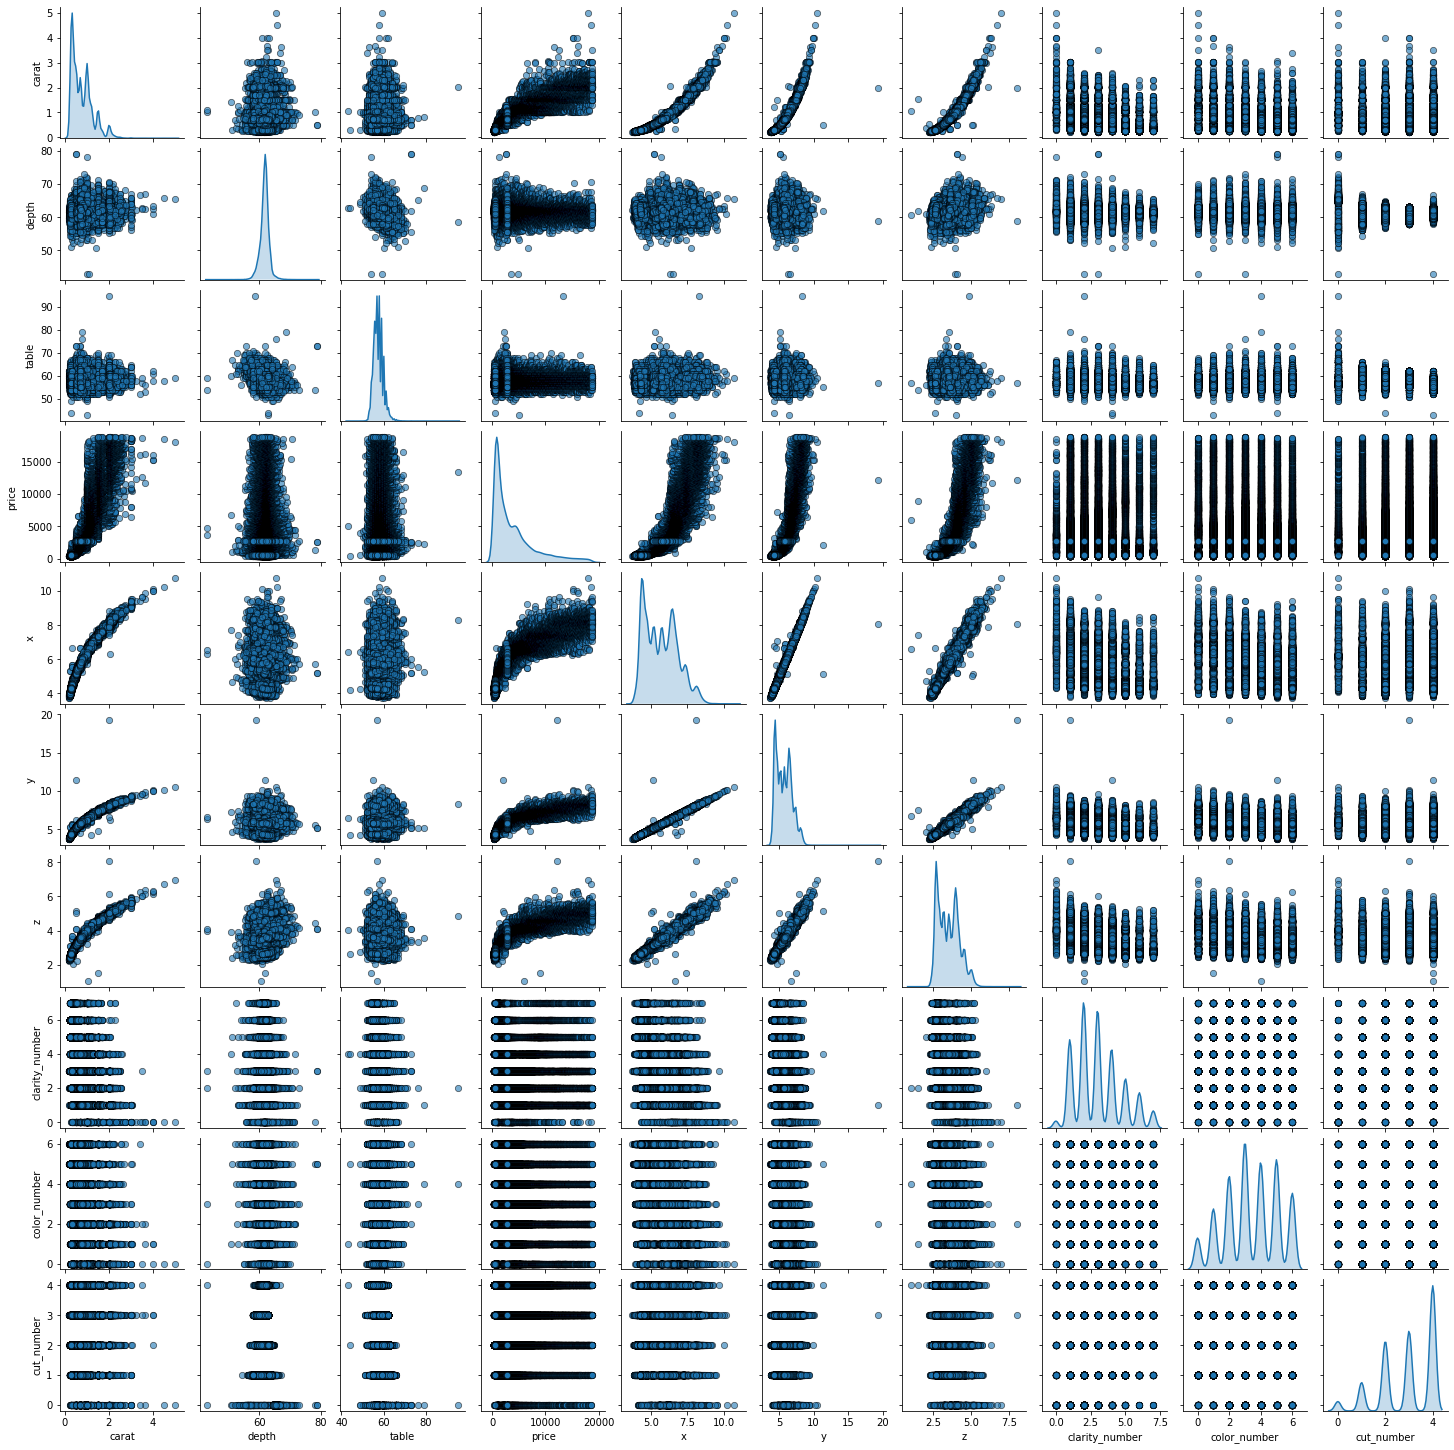

In [23]:
sns.pairplot(df_diamonds, diag_kind = 'kde', height=2, plot_kws = {'alpha': 0.6, 's': 40, 'edgecolor': 'k'})

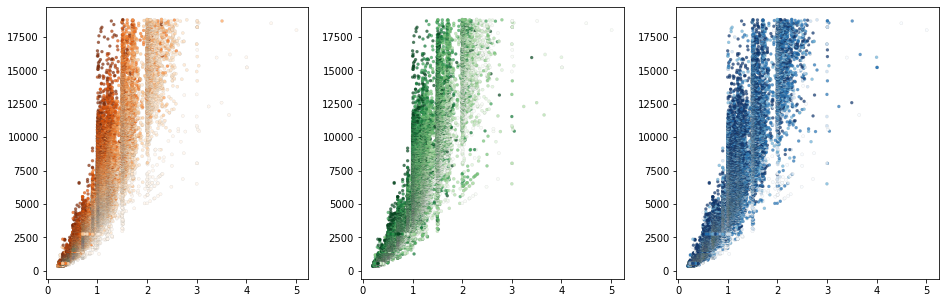

In [24]:
kwargs  =   {'edgecolor':"#717572", 'linewidth':.1, 'alpha':0.7, 's':10}

f, ax = plt.subplots(1, 3, figsize=(16,5))

ax[0].scatter('carat' , 'price',c='clarity_number',cmap='Oranges', data=df_diamonds, **kwargs)
ax[0].grid(False)

ax[1].scatter('carat' , 'price',c='color_number',cmap='Greens', data=df_diamonds, **kwargs)
ax[1].grid(False)

ax[2].scatter('carat' , 'price',c='cut_number',cmap='Blues', data=df_diamonds, **kwargs)
ax[2].grid(False)


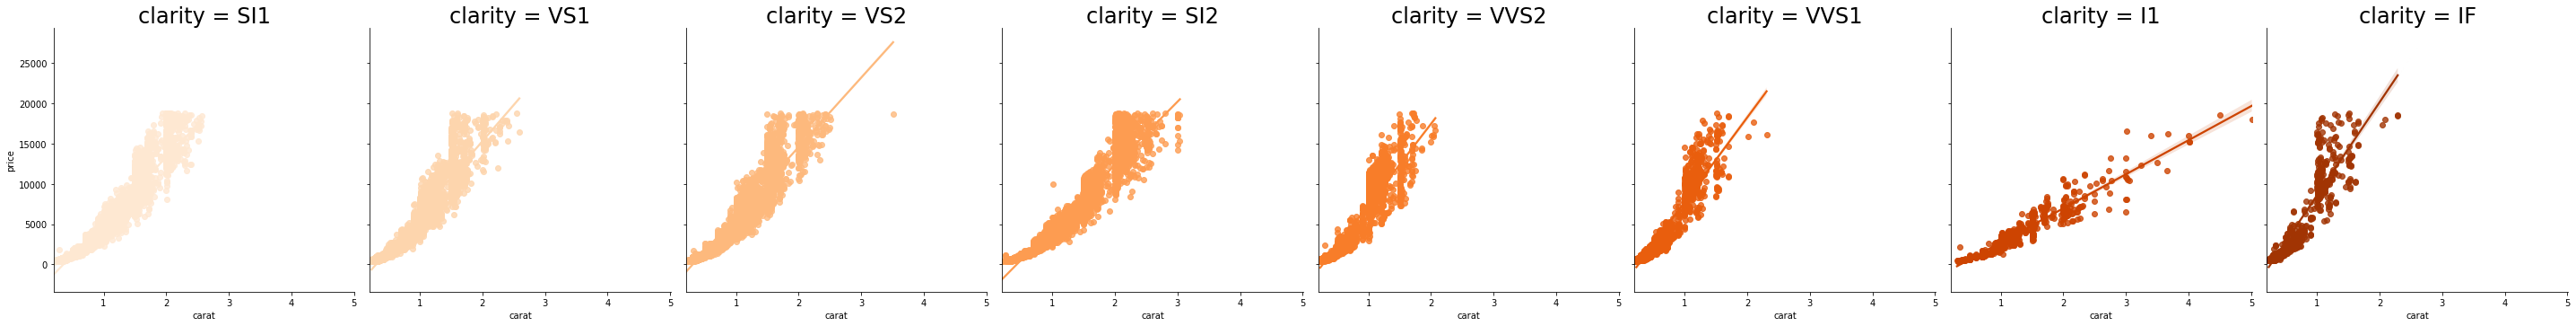

In [25]:
sns.lmplot('carat' , 'price',hue='clarity', data=df_diamonds, palette='Oranges',col='clarity').set_titles(size=24)

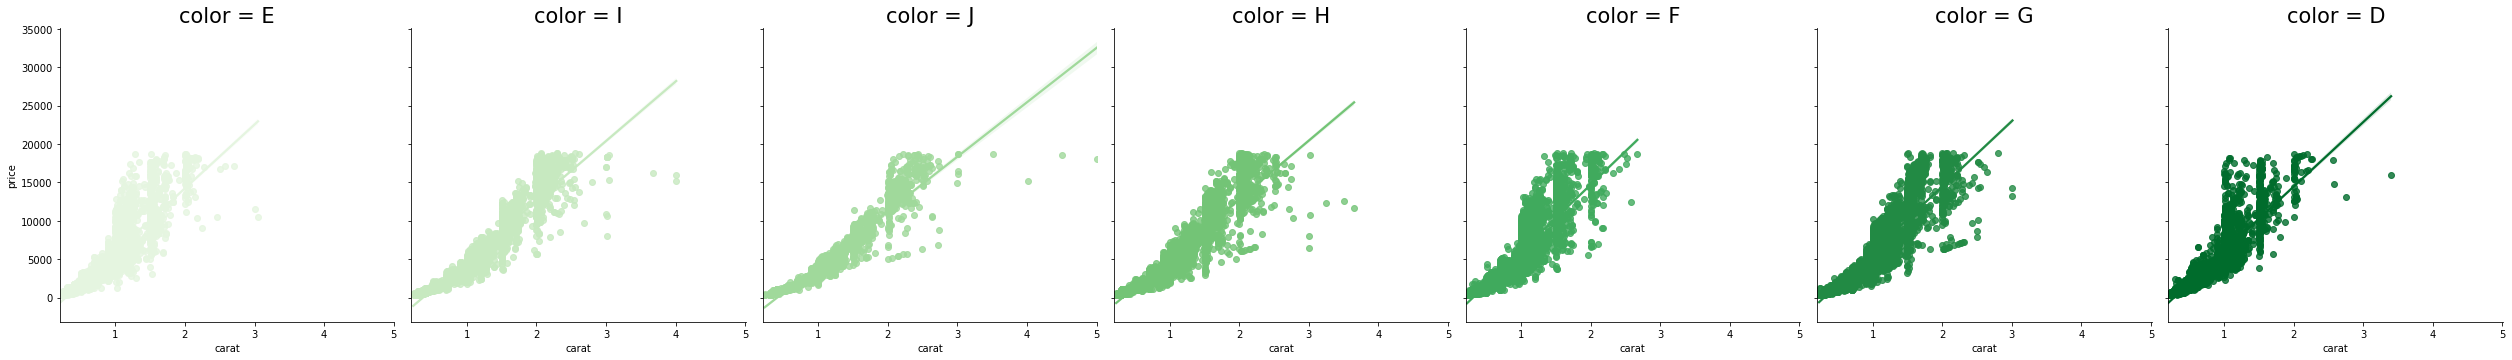

In [26]:
sns.lmplot('carat' , 'price',hue='color', data=df_diamonds, palette='Greens',col='color').set_titles(size=21)

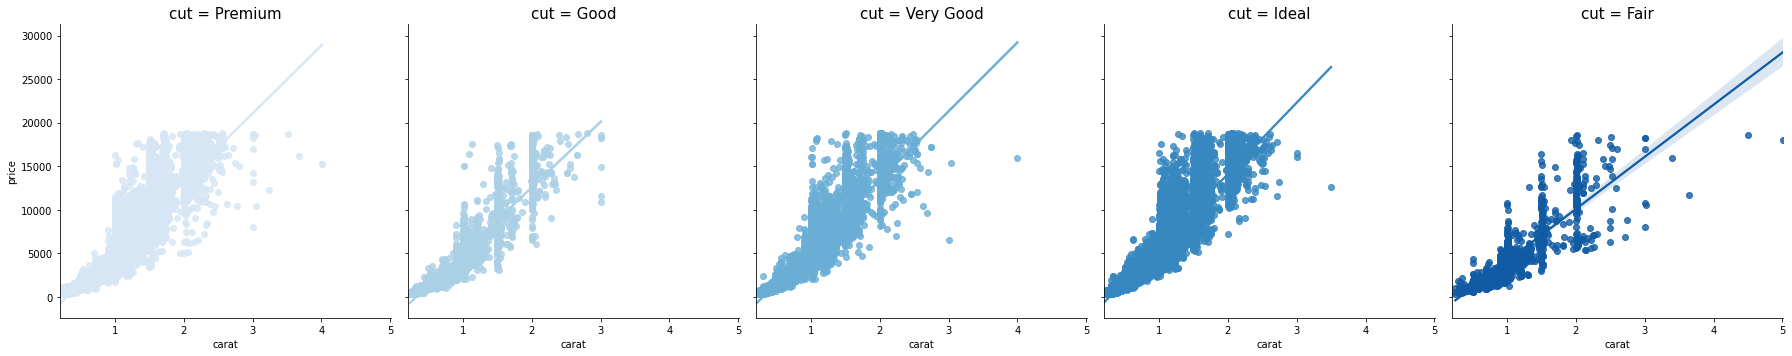

In [27]:
sns.lmplot('carat' , 'price',hue='cut', data=df_diamonds, palette='Blues',col='cut').set_titles(size=15)

<AxesSubplot:xlabel='carat', ylabel='price'>

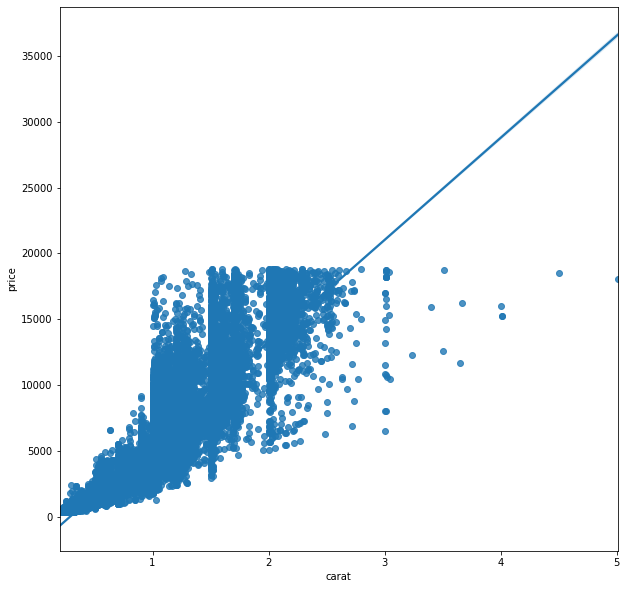

In [28]:
plt.figure(figsize=(10, 10))
sns.regplot(df_diamonds.carat, df_diamonds.price, scatter=True)


# TESTING MODEL

## 1 MODEL

In [ ]:
X = diamonds[['carat', 'color_number', 'cut_number']]
y = diamonds['price']

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LinearRegression()

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
model.fit(X_train_std, y_train)

X_test_std = scaler.transform(X_test)
predictions = model.predict(X_test_std)

np.sqrt(mean_squared_error(y_test, predictions))

## 2 MODEL - USING CLARITY TO SEPARETE DIAMONDS

In [ ]:
for x in range(8):
    mask1 = (diamonds['clarity_number'] == x)
    diamonds_clarity_0 = diamonds.loc[mask1,:]
    X = diamonds_clarity_0[['carat','color_number','cut_number','y','x']]
    y = diamonds_clarity_0['price']

    X_train, X_test, y_train, y_test = train_test_split(X, y)

    model = LinearRegression()
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_std = scaler.transform(X_train)
    model.fit(X_train_std, y_train)
    X_test_std = scaler.transform(X_test)
    predictions = model.predict(X_test_std)

    print(f'clarity = {x}  RMSE = {np.sqrt(mean_squared_error(y_test, predictions))}')

# Rick's diamonds

In [ ]:
rick = pd.read_csv('rick_diamonds.csv')

In [ ]:
mask = (rick['x'] == 0) | (rick['y'] == 0) | (rick['z'] == 0)
rick.loc[mask,:].head()

In [ ]:
rick.describe()

In [ ]:
creating_classification(rick)
rick.head()

In [ ]:
def predit_diamonds(df, df_model):

    #criando modelo de previsão
    for clarity in range(8):
        #separa o dataset por claridade do diamante
        mask = (df_model['clarity_number'] == clarity)
        diamonds_clarity = df_model.loc[mask,:]
       
        #dados utilizados para prever treinar o modelo
        
        columns_predict = ['carat','y','x']
        
        X = diamonds_clarity[columns_predict]
        y = diamonds_clarity['price']
        
        X_train, X_test, y_train, y_test = train_test_split(X, y)
        
        #treinando o modelo
        model = LinearRegression()
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train_std = scaler.transform(X_train)
        model.fit(X_train_std, y_train)
    
    
        #testando o modelo    
        X_test_std = scaler.transform(X_test)
        predictions_test = model.predict(X_test_std)
    
        print(f'claridade {clarity}, erro {np.sqrt(mean_squared_error(y_test, predictions_test))}')
    
    
        #prevendo os dados
        mask = (df['clarity_number'] == clarity)
        diamonds_predict = df.loc[mask,:]
    
    
    
        X_predict = diamonds_predict[columns_predict]
        #print(X_predict)
        X_predict_std = scaler.transform(X_predict)
        predictions = model.predict(X_predict_std)
        
        #incluindo valores no dataset
        
        df.loc[mask,'price_predicted'] = predictions

In [ ]:
predit_diamonds(rick, diamonds)

In [ ]:
rick.head()

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(rick['carat'], rick['price_predicted'], hue = rick['clarity_number']);

# Rick's diamonds 2

In [ ]:
def predit_diamonds_lower(df, df_model):

    columns_predict = ['carat','y','x']    
    
    mask = df_model['carat'] < .5
    df_model = df_model.loc[mask,:]
        
    X = df_model[columns_predict]
    y = df_model['price']
        
    mask = df['price_predicted'] < 300
    df2 = df.loc[mask,:]
        
    model = LinearRegression()
    scaler = StandardScaler()
        
    #training the model
    scaler.fit(X)
    X_std = scaler.transform(X) 
    model.fit(X_std, y)        
        
    X_predict = df2[columns_predict]

    X_predict_std = scaler.transform(X_predict)
    predictions_low = model.predict(X_predict_std)

    df.loc[mask,'price_predicted'] = predictions_low

In [ ]:
predit_diamonds_lower(rick,diamonds)

In [ ]:
plt.figure(figsize=(10, 7))
sns.scatterplot(rick['carat'], rick['price_predicted'], hue = rick['clarity_number']);

In [ ]:
rick.describe()

# EXPORTANDO

In [ ]:
rick_site = rick[['carat','cut','color','clarity','depth','table','x','y','z','price_predicted']]

In [ ]:

#primeiro modelo fazer a media

#fazer log do carat pelo log do preço
#quando aplica o log cai numa relação mais linear

#analisar os coeficientes
#log10 para voltar 10 elevado ao valor real

#PLOTAR RESIDUO